# IMPORTS

In [1]:
#data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

#preprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#autres:
import time
import math as m
from scipy.spatial import distance
from google.colab import drive

import nltk
import spacy
from nltk.stem import SnowballStemmer,PorterStemmer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize
import re

In [ ]:
nltk.download('popular')

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_fiverr_initial = pd.read_csv('/content/drive/MyDrive/Projets/Datathon/Datathon Fiverr/CSV/NLP Topic.csv')

In [5]:
df_fiverr = pd.read_csv('/content/drive/MyDrive/Projets/Datathon/Datathon Fiverr/CSV/Clean_dataset 2.0.csv')

#EDA 

Critères de classification des Top Seller (Top rated / Level 2 / Level 1)

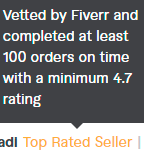 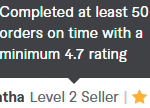
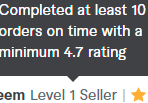

In [ ]:
df_fiverr['user_stats_from_1'].value_counts()

In [ ]:
df_fiverr.head()

In [ ]:
df_fiverr.info()

In [7]:
ue_members = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [8]:
len(ue_members)

27

In [9]:
df_fiverr['user_stats_from_1'].value_counts()

Pakistan                      337
Bangladesh                    132
India                          92
Nigeria                        60
United States                  51
Sri Lanka                      23
United Kingdom                 14
Germany                        13
Kenya                          11
Romania                         7
Philippines                     6
Ukraine                         5
Italy                           5
Israel                          4
Canada                          4
Mexico                          4
Saudi Arabia                    4
Netherlands                     4
Argentina                       4
Croatia                         3
Russia                          3
Australia                       3
United Arab                     3
Indonesia                       3
Portugal                        2
Colombia                        2
Dominican Republic              2
Bulgaria                        2
Belarus                         2
Spain         

In [10]:
df_fiverr['seller_link 1'].value_counts()

big_projects       5
ambreenfalah       5
mark_deen          5
mahendralokhand    4
wix_mentor         4
                  ..
nickcarvajal       1
trusteddesigner    1
moshiurshimul      1
kunal141289        1
jovainc            1
Name: seller_link 1, Length: 798, dtype: int64

Repérer les NaN dans les 'rating-score 1'

- Vérification manuelle
- Suppression deslignes qui n'ont "vraiment" pas de note

In [11]:
df_fiverr['rating_score 1'].isna().value_counts()

False    823
True      58
Name: rating_score 1, dtype: int64

In [12]:
level_displayed = df_fiverr['seller_level 1'].value_counts().sum()

In [13]:
ratio_level = round(level_displayed/len(df_fiverr), ndigits=2)
ratio_level

0.73

71% des fiverr du DF ont un level renseigné.


Cela n'inclut pas les pros qualified.

# SCRAPPING

Imports

In [14]:
import requests
from bs4 import BeautifulSoup

Générer les URLs des profils

- faire un pandas serie des users names (seller_link 1)
- ou générer directement les URLs en bouclant sur la colonne username

- request sur les pages

- trouver LES balises des données qui nous intéressent :

   - global_rating
   - number of rating
   - collect_number
   - reviews
   - number of reviews

In [15]:
df_fiverr.columns

Index(['Address', 'seller_link 1', 'seller_level 1', 'rating_score 1',
       'ratings_count 1', 'orders_in_queue 1', 'collect_count 1', 'title_1',
       'description_content 1', 'metadata_1', 'one_liner_1',
       'user_stats_from_1', 'user_stats_member_since_1',
       'user_stats_response_time_1', 'user_stats_last_delivery',
       'seller_desc_expanded_1', 'package1_title_1', 'package1_type_1',
       'package1_price_1', 'package1_desc_1', 'package2_title_1',
       'package2_type_1', 'package2_price_1', 'package2_desc_1',
       'package3_title_1', 'package3_type_1', 'package3_price_1',
       'package3_desc_1', 'faq1_q_1', 'faq1_a_1', 'faq2_q_1', 'faq2_a_1',
       'faq3_q_1', 'faq3_a_1', 'faq4_q_1', 'faq4_a_1', 'review1_desc_1',
       'review2_desc_1', 'review3-desc 1', 'review1_rating_1',
       'review2_rating_1', 'review3_rating_1', 'category_1'],
      dtype='object')

In [16]:
list_user = df_fiverr['seller_link 1'].tolist()

In [17]:
url = 'https://www.fiverr.com/'+df_fiverr['seller_link 1']

In [18]:
list_url = []
for user in list_user:
 list_url.append('https://www.fiverr.com/'+user)

In [19]:
list_url[0]

'https://www.fiverr.com/westcoastwp'

### Liste Users : OK
Maintenant il faut lancer un request sur chaque URL de profile

In [20]:
header = {'User-Agent' : 'Mozilla/5.0 (Linux; Android 7.0; SM-G930V Build/NRD90M) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.125 Mobile Safari/537.36'}



In [22]:
list_user[0]

'westcoastwp'

In [23]:
html_test = requests.get(list_url[0], headers=header)

In [ ]:
print(html_test.text)

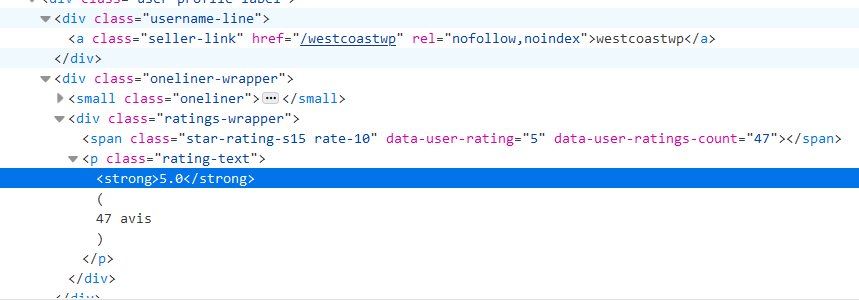

In [26]:
soup_test = BeautifulSoup(html_test.text,'html.parser')

In [27]:
rate_test = soup_test.find_all('p',class_="rating-text")

In [28]:
len(rate_test[0])

6

In [29]:
rate_test[0]

<p class="rating-text"><strong>5.0</strong> (<!-- -->47 reviews<!-- -->)</p>

In [30]:
rate_list = list(rate_test[0])

In [31]:
rate_list

[<strong>5.0</strong>, ' (', ' ', '47 reviews', ' ', ')']

### On a réussi à scrapper le nbre de Gigs proposés par un profile de Fiverr

In [32]:
#Nombre de gigs pour un seller :

gigs = soup_test.find('div',class_="gig_listings-package listing-container")

In [33]:
len(gigs)

4

In [ ]:
liste_nb_gigs = []
for gugus in list_url:
  htmlX = requests.get(gugus, headers=header)
  soupX = BeautifulSoup(htmlX.text,'html.parser')
  gigs = soupX.find('div',class_="gig_listings-package listing-container")
  liste_nb_gigs.append(len(gigs))


Le scrapping a échoué en raison de la protection existante sur le site Fiverr

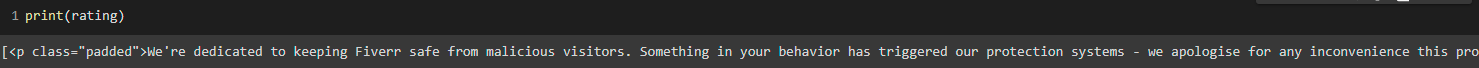

# NLP

In [35]:
df_fiverr.columns

Index(['Address', 'seller_link 1', 'seller_level 1', 'rating_score 1',
       'ratings_count 1', 'orders_in_queue 1', 'collect_count 1', 'title_1',
       'description_content 1', 'metadata_1', 'one_liner_1',
       'user_stats_from_1', 'user_stats_member_since_1',
       'user_stats_response_time_1', 'user_stats_last_delivery',
       'seller_desc_expanded_1', 'package1_title_1', 'package1_type_1',
       'package1_price_1', 'package1_desc_1', 'package2_title_1',
       'package2_type_1', 'package2_price_1', 'package2_desc_1',
       'package3_title_1', 'package3_type_1', 'package3_price_1',
       'package3_desc_1', 'faq1_q_1', 'faq1_a_1', 'faq2_q_1', 'faq2_a_1',
       'faq3_q_1', 'faq3_a_1', 'faq4_q_1', 'faq4_a_1', 'review1_desc_1',
       'review2_desc_1', 'review3-desc 1', 'review1_rating_1',
       'review2_rating_1', 'review3_rating_1', 'category_1'],
      dtype='object')

In [36]:
df_fiverr['review1_desc_1'].isna().value_counts()

False    823
True      58
Name: review1_desc_1, dtype: int64

In [37]:
X_review = df_fiverr['review1_desc_1']

In [38]:
X_review = X_review.dropna()

In [39]:
X_review.isna().value_counts()

False    823
Name: review1_desc_1, dtype: int64

In [40]:
X_review = X_review.astype('str')

In [41]:
#Ma magnifique fonction avec une bonne vieille boucle bien gourmande en ressources

def func_clean(strX):
  stop_words = nltk.corpus.stopwords.words("english")  #définition des stopwords english
  punctuation = RegexpTokenizer(r'\w+')                #tokenizer la chaîne en enlevant la ponctuation
  strX_token_no_punct = punctuation.tokenize(strX)
  liste_clean = []                                     #instanciation d'une liste dite "clean"
  for word in strX_token_no_punct:                     #pour chaque token du str sans ponctuation, si le token est dnas stopwords on ne fait rien, si pas dedans = on ajoute à "liste clean"
    if word in stop_words:
      pass
    else:
      liste_clean.append(word)
  strX_clean = ' '.join(liste_clean)                   #Je transforme la liste en une chaîne
  strX_clean = strX_clean.lower()                      #Je mets tous les mots en minuscules
  return strX_clean

In [42]:
from nltk import RegexpTokenizer

C'est ICI que j'applique le clean des str

In [43]:
X_review_clean = X_review.apply(func_clean)

In [44]:
X_review[0]

"Finerfox Media is hands down the best dev team I've had the pleasure of working with. This project sprung up quickly, but their team was cool and calm and ready to take it on. I've already asked if they'd be willing to take on other work and can't wait for the next opportunity to work with them!"

In [45]:
X_review_clean[0]

'finerfox media hands best dev team i pleasure working this project sprung quickly team cool calm ready take i already asked willing take work wait next opportunity work'

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True)

tfidf.fit(X_review_clean)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [47]:
count_vectorizer = CountVectorizer(strip_accents='unicode', stop_words='english',lowercase=True)
count_vectorizer.fit(X_review_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [48]:
X_review_clean_cv = tfidf.transform(X_review_clean)

In [49]:
X_review_clean_cv

<823x2540 sparse matrix of type '<class 'numpy.float64'>'
	with 12764 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

Je test de séparer train/test split

#tfidf tentative 1

---



In [ ]:
import nltk
import spacy
nltk.download('popular')

Les descriptions n'ont plus de stopwords, plus de ponctuation et tout est en minuscule

In [ ]:
X_text_clean = X_text.apply(func_clean)

In [53]:
pd.set_option('display.max_colwidth', 500)

In [ ]:
X_text_clean.head(20)

TF-IDF

In [ ]:
X_text[0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf.fit(X_text_clean)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X_idf_vecto = tfidf.transform(X_text_clean)

In [ ]:
X_idf_vecto

<881x6750 sparse matrix of type '<class 'numpy.float64'>'
	with 81969 stored elements in Compressed Sparse Row format>

#NLP depuis livecode sur Reviews

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('popular')

In [58]:
X_review_clean.isna().value_counts()

False    823
Name: review1_desc_1, dtype: int64

Les données ont été nettoyée :  lower, pas de NaN, punctuation, stopwords.


In [59]:
X_review[800]

"This is the forth time I've used this seller. All other websites were good, but this time there was much more back and forth than I anticipated. From the beginning I got the wrong priced gig and what was produced was not good at all. We agreed to pay more and selected a wix template which helped but there was a lot of small errors which required revisions and the communication response was on average 3-7 days so it took really long to get to a point that the website was ready. That said I am now happy with the website but I will think very carefully about whether to go through this again."

In [60]:
X_review_clean[800]

'this forth time i used seller all websites good time much back forth i anticipated from beginning i got wrong priced gig produced good we agreed pay selected wix template helped lot small errors required revisions communication response average 3 7 days took really long get point website ready that said i happy website i think carefully whether go'

#Bag Of Words sur Review 1

In [61]:
#exemple pour tester diffèrents hyperparametres de countvectorizer
count_vect = CountVectorizer(max_features=5000,max_df=0.5,min_df=30)

In [62]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=5000, min_df=30,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [63]:
count_vect.fit(X_review_clean)
X_review_vec = count_vect.transform(X_review_clean)

In [64]:
X_review_vec

<823x88 sparse matrix of type '<class 'numpy.int64'>'
	with 5642 stored elements in Compressed Sparse Row format>

In [65]:
#si on veut observer X, il faut le transformer en dataframe
array_review_vec = X_review_vec.toarray()

df_review_vec = pd.DataFrame(array_review_vec,
                             columns=count_vect.get_feature_names())

In [66]:
df_review_vec.head()

,able,also,always,amazing,anyone,asked,best,beyond,business,communication,definitely,delivered,delivery,design,done,easy,even,every,everything,exactly,excellent,expectations,experience,extremely,fantastic,fast,first,fiverr,future,get,go,good,great,guy,happy,he,help,helpful,highly,it,...,my,need,needed,one,patient,pleasure,process,professional,project,quality,questions,quick,really,recommend,recommended,responsive,seller,service,services,she,site,super,sure,thank,thanks,the,this,time,use,using,very,wanted,website,well,went,will,work,worked,working,would
0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,2,0,0,0,1,0,0,1


In [67]:
liste_bow_review = df_review_vec.columns

In [68]:
liste_bow_review

Index(['able', 'also', 'always', 'amazing', 'anyone', 'asked', 'best',
       'beyond', 'business', 'communication', 'definitely', 'delivered',
       'delivery', 'design', 'done', 'easy', 'even', 'every', 'everything',
       'exactly', 'excellent', 'expectations', 'experience', 'extremely',
       'fantastic', 'fast', 'first', 'fiverr', 'future', 'get', 'go', 'good',
       'great', 'guy', 'happy', 'he', 'help', 'helpful', 'highly', 'it', 'job',
       'look', 'looking', 'lot', 'love', 'made', 'make', 'much', 'my', 'need',
       'needed', 'one', 'patient', 'pleasure', 'process', 'professional',
       'project', 'quality', 'questions', 'quick', 'really', 'recommend',
       'recommended', 'responsive', 'seller', 'service', 'services', 'she',
       'site', 'super', 'sure', 'thank', 'thanks', 'the', 'this', 'time',
       'use', 'using', 'very', 'wanted', 'website', 'well', 'went', 'will',
       'work', 'worked', 'working', 'would'],
      dtype='object')

In [ ]:
for element in liste_bow_review:
  liste_tf_review[element]

#TFIDF FINAL

In [71]:
X_review_clean

0                                                                                                                                                                                                                                      finerfox media hands best dev team i pleasure working this project sprung quickly team cool calm ready take i already asked willing take work wait next opportunity work
1      yasseen got site done get site done 10 people site said possible wix wix goto choice ease use sellers want give pretty site basic function whole point wix idiot include yasseen put complicated functions i understand amp 10 wix specialists could site i recommend highly enough point site specialists pro level 2 sellers failed easily i arranged 2nd order amp using future good people hard find
2                                                                                                                                                                                                       

In [72]:
def get_top_n_words(corpus, add_stopwords, maxfeatures, maxdf, ngram):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.

    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(add_stopwords)

    vec = CountVectorizer(max_features = maxfeatures ,max_df = maxdf ,ngram_range = ngram, stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in vec.vocabulary.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:maxfeatures]

In [73]:
add_stopwords = []

In [ ]:
#add_stopwords : hyperparametre

common_words = get_top_n_words(X_review_clean,add_stopwords ,50, 0.2, (1,1))
for word, freq in common_words:
  if word not in stopwords and (word.strip().isdigit()==False) :
    print(word, freq)

#WordMaping

In [ ]:
'communication': 131,
'fast': 129,
'professional': 106,
'experience': 62,
'design': 52,
'help': 50,
'patient': 49,
'responsive': 43,
'helpful': 33,
'quality': 33,
'complete': 31,
'beyond':24,
'result': 24,
'satisfied': 24,
'business': 23,
'super': 23,
'many': 23,
'developer': 23,
'every': 23,
'issue': 22

In [ ]:
'communication': 131,
'fast': 129,
'professional': 106,
'design': 73,
'experience': 62,
'help': 50,
'patient': 49,
'responsive': 43,
'helpful': 33,
'quality': 33,
'complete': 31,
'beyond': 24,
'result': 24,
'business': 23,
'developer': 23,
'revision': 22,
'issue' :22,
'knowledgeable': 22,
'expectation': 21,
'outstanding': 21

In [ ]:
dico = {'communication': 131,
'fast': 129,
'professional': 106,
'design': 73,
'experience': 62,
'help': 50,
'patient': 49,
'responsive': 43,
'helpful': 33,
'quality': 33,
'complete': 31,
'beyond': 24,
'result': 24,
'business': 23,
'developer': 23,
'revision': 22,
'issue' :22,
'knowledgeable': 22,
'expectation': 21,
'outstanding': 21}

In [ ]:
string_test =  ' '
for key,value in dico.items():
  string_test+=(key+' ')*value
print(string_test)

In [ ]:
list_test =  string_test.split()

In [ ]:
list_test

In [ ]:
import random 
import numpy as np
np.random.seed(20)
random.shuffle(list_test)

In [ ]:
list_test

In [ ]:
list_shuffle

In [ ]:
dico_freq = {key : round(value/131,2) for key,value in dico.items()}

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_net = WordCloud(background_color='white',width=500, height=200, max_font_size=200, min_font_size=10)

# Génération du wordcloud depuis un texte
nuage = wordcloud_net.generate_from_text(' '.join(list_test))

In [ ]:
nuage.words_

{'beyond': 0.183206106870229,
 'business': 0.17557251908396945,
 'communication': 1.0,
 'complete': 0.2366412213740458,
 'design': 0.5572519083969466,
 'developer': 0.17557251908396945,
 'expectation': 0.16030534351145037,
 'experience': 0.4732824427480916,
 'fast': 0.9847328244274809,
 'help': 0.3816793893129771,
 'helpful': 0.25190839694656486,
 'issue': 0.16793893129770993,
 'knowledgeable': 0.16793893129770993,
 'outstanding': 0.16030534351145037,
 'patient': 0.37404580152671757,
 'professional': 0.8091603053435115,
 'quality': 0.25190839694656486,
 'responsive': 0.3282442748091603,
 'result': 0.183206106870229,
 'revision': 0.16793893129770993}

#Génération imshow du nuage

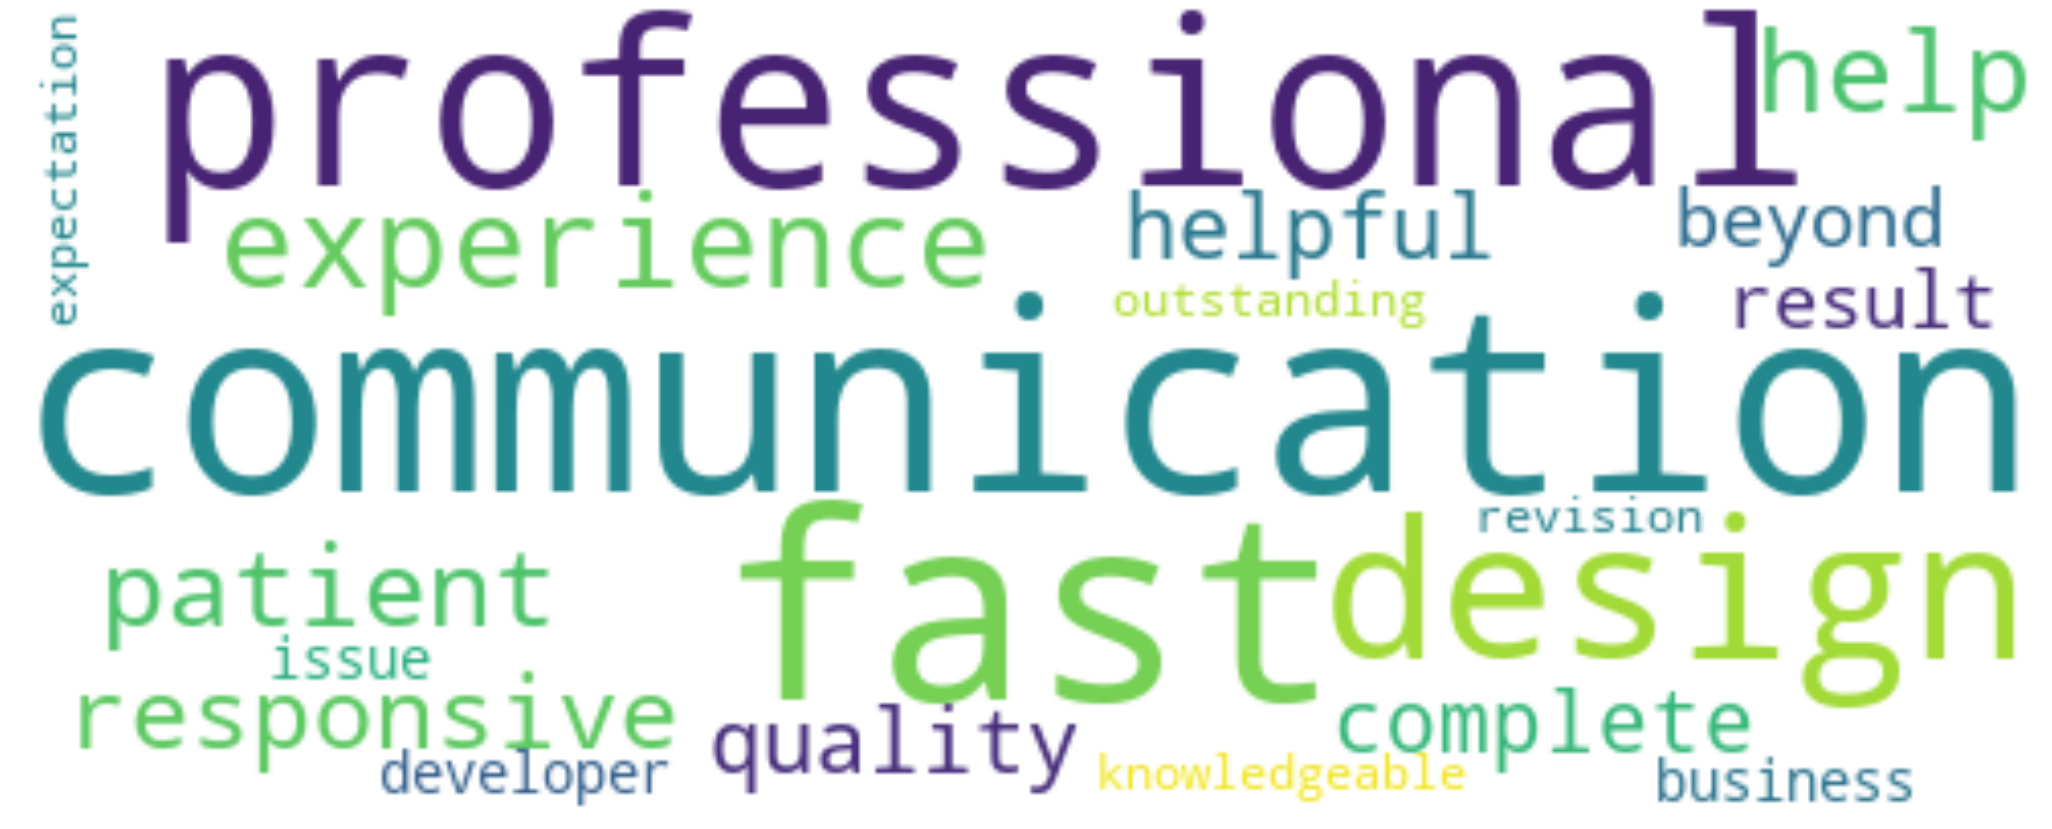

In [ ]:
import seaborn as sns
plt.figure(figsize=(50,15))
plt.imshow(nuage, interpolation="bilinear",cmap='vlag')
plt.axis("off")
plt.margins(x=0, y=0)

plt.show()